# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# load_diabetes 데이터 가져오기 
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


#### 파라미터인 as_frame을 True로 설정하면 판다스 데이터프레임으로 사용할 수 있다는데. 공식 사이트를 봐도 어떻게 사용하는지 모르겠다 

REF) 
https://yhyun225.tistory.com/11
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [94]:
type(diabetes)

sklearn.utils.Bunch

In [95]:
# diabetes의 data를 df_X에 저장
df_X = diabetes.data

print(df_X.shape)
df_X

(442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [96]:
# diabetes의 target을 df_y에 저장
df_y = diabetes.target

print(df_y.shape)
df_y

(442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [97]:
# diabetes의 target을 re_y에 따로 저장
re_y = diabetes.target.reshape(-1,1) 
re_y 

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

 #### data와 target을 합친 데이터프레임을 만들고 싶어서 re_y라는 배열을 따로 따로 만들어주었다. 

In [98]:
diabetes.feature_names 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- age : 나이
- sex : 성별 
- bmi : 체질량지수
- bp : 평균 혈압 
- s1 : tc, 혈중 콜레스테롤
- s2 : LDL콜레스테롤(저밀도콜레스테롤)
- s3 : HDL콜레스테롤(고밀도콜레스테롤)
- s4 : tch, 총 콜레스테롤 
- s5 : ltg, possibly log of serum triglycerides level 혈중 트리글리세리드인듯하다 
- s6 : glu, 혈당지수 

REF)
https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
https://blog.naver.com/since1916/222049890489 고지혈증 수치 

In [99]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [100]:
# diabetes.feature_names 을 컬럼명으로 하는 DataFrame 자료형으로 변환해서 diabetes_df 변수에 저장
diabetes_df = pd.DataFrame(data=df_X, columns=diabetes.feature_names )

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### 데이터프레임을 출력하고 보니 age, sex 등이 모두 소수점 이하가 포함된 수치로 나타난게 이상하다고 생각되어서 원래 그런 데이터인지, 내가 뭔가 잘못한건지 확인하기 위해 검색해보았다. 원래 그런 데이터였다. 모든 수치가 -0.2~0.2 사이에 분포하도록 조정한 데이터셋이라고 한다. 

REF)    
https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html    

#### 데이터프레임의 값이 모두 수치 데이터인 것으로 보아 회귀 모델을 사용해야 한다. 

In [101]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


#### 그런데 계속 진행하면서 gradient 구하기 위해서는 target이 아예 포함되어있는 데이터프레임을 시각화하면 좋을 것 같아서 다시 위의 블로그를 참조해 바꿔주었다.  concat을 concatenate로 풀어써도 된다는걸 알게되었다. 

In [102]:
# data와 target을 합친 새로운 데이터프레임 whole_data 생성 
columns = diabetes.feature_names 
columns.append("Target")

whole_data = np.concatenate([df_X,re_y],axis=1)
whole_df = pd.DataFrame(whole_data,columns = columns)
whole_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


<AxesSubplot:>

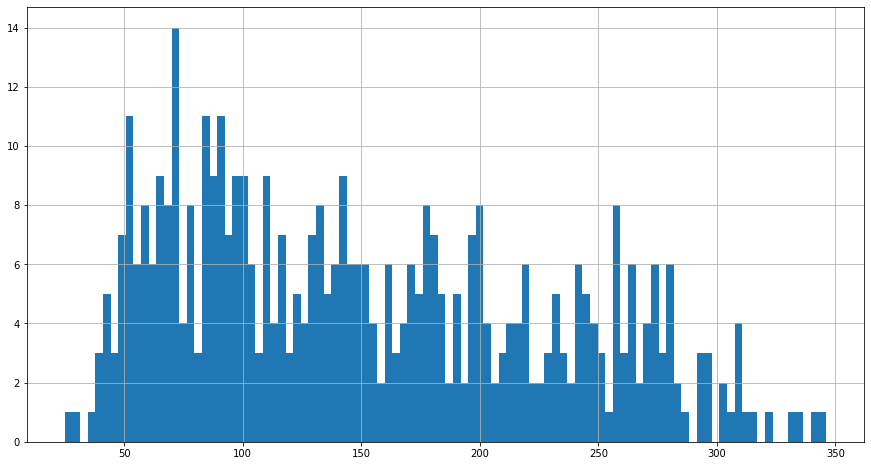

In [103]:
# target(hist)
whole_df['Target'].hist(bins=100, figsize=(15,8))

#### 히스토그램만으로는 새로운 정보를 얻기 어려웠다.

In [104]:
# 상관계수
rel_df = whole_df.corr()
rel_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


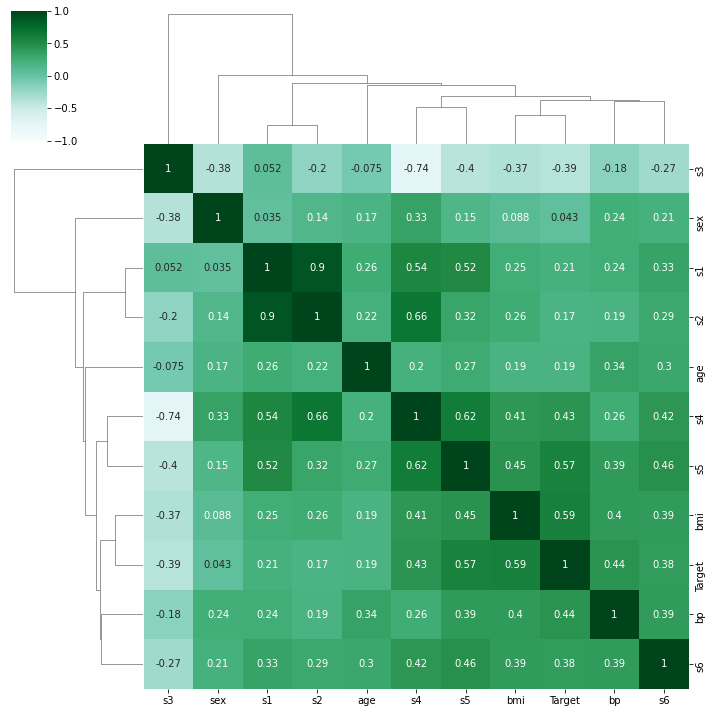

In [105]:
# 히트맵으로 상관관계 파악 

sns.clustermap(rel_df, annot = True, cmap = 'BuGn', vmin = -1, vmax = 1)

#### 히트맵으로 보아 Target인 당뇨 수치와 가장 관련있는건 bmi 수치와 s5임을 알 수 있다. 

## (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [106]:
type(df_X)

numpy.ndarray

#### df_X는 이미 numpy array 이다 .

## (3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [107]:
type(df_y)

numpy.ndarray

#### df_y도 이미 numpy array 이다 .

## (4) train 데이터와 test 데이터로 분리하기

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [108]:
# train, test 데이터 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [109]:
X = whole_df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = whole_df['Target'].values
print("X, y 준비완료!")

X, y 준비완료!


In [110]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
W, b

(array([0.99765644, 0.70640807, 0.83005498, 0.52057395, 0.06200828,
        0.57407173, 0.10397753, 0.28129234, 0.39687329, 0.82145182]),
 0.12190790852437805)

In [111]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("모델 준비완료!")

모델 준비완료!


## (6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [112]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("MSE 준비완료!")

MSE 준비완료!


In [113]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("loss 준비완료!")

loss 준비완료!


## (7) 기울기를 구하는 gradient 함수 구현하기    

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [114]:
# gradient 함수 정의 
def gradient(X, W, b, y):
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("gradient 함수 준비완료!")

gradient 함수 준비완료!


In [115]:
# 시험삼아 gradient 하나 출력!
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36736477 -0.30890691 -4.28693396 -3.22504811 -1.54493098 -1.26693129
  2.88601175 -3.14372221 -4.13602647 -2.79170637]
db: -304.02315250874307


## (8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [116]:
# 학습률 설정 
LEARNING_RATE = 0.0001

## (9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [117]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 21897.7255
Iteration 2000 : Loss 16714.3369
Iteration 3000 : Loss 13237.1135
Iteration 4000 : Loss 10903.5277
Iteration 5000 : Loss 9336.5220
Iteration 6000 : Loss 8283.3578
Iteration 7000 : Loss 7574.6264
Iteration 8000 : Loss 7096.7746
Iteration 9000 : Loss 6773.6885
Iteration 10000 : Loss 6554.3497


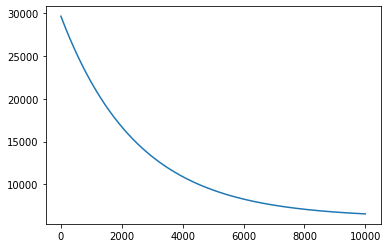

In [118]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#### 그래프가 너무 천천히 떨어진다. loss값이 떨어진 후 조금 더 안정적인 상태를 유지했으면 좋겠다 

In [119]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

4920.732709691027

In [120]:
# 학습률 바꿔서 다시 시도! 복잡한 데이터셋에서 학습률은 0.0001~0.01로 설정한다고 한다!
LEARNING_RATE = 0.001

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 6050.2084
Iteration 2000 : Loss 5961.9070
Iteration 3000 : Loss 5883.7134
Iteration 4000 : Loss 5808.1402
Iteration 5000 : Loss 5734.9676
Iteration 6000 : Loss 5664.1114
Iteration 7000 : Loss 5595.4928
Iteration 8000 : Loss 5529.0355
Iteration 9000 : Loss 5464.6661
Iteration 10000 : Loss 5402.3136


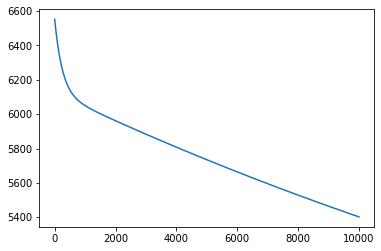

In [121]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#### 학습률을 올린 후의 그래프가 더 이상하다.  loss가 5000대 이하로 줄지 않으니 mse가 4000대에 머물러있다. 

In [122]:
# 학습률을 많이 높여보자!
LEARNING_RATE = 0.05

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3818.6991
Iteration 2000 : Loss 3384.5500
Iteration 3000 : Loss 3204.8050
Iteration 4000 : Loss 3105.7137
Iteration 5000 : Loss 3043.8921
Iteration 6000 : Loss 3003.3976
Iteration 7000 : Loss 2976.2002
Iteration 8000 : Loss 2957.5890
Iteration 9000 : Loss 2944.6288
Iteration 10000 : Loss 2935.4408


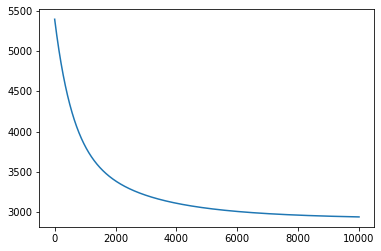

In [123]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#### 그 후에 상관계수가 높은 컬럼만 남겨서 모델을 돌리는 실험해보았다. 

In [124]:
# # 상관계수가 높은 컬럼만 남겨 실험 
# X = whole_df[['bmi', 'bp', 's4', 's5']].values
# # y = whole_df['Target'].values
# print("새로운 X 준비완료!")

In [125]:
# # train, test 데이터 분리 
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     df_y , 
#                                                     test_size=0.2, 
#                                                     random_state=50)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

#### 왜 안되는지 모르겠지만, 새로운 컬럼으로 데이터를 만들어 모델을 돌리면 IndexError: index 4 is out of bounds for axis 1 with size 4 에러가 난다. 
#### 구글 검색해서 봐도 사람마다 상황이 달라서 시간만 오래 쓰고 결국 해결하지 못한채 마무리 했다. 

REF)    
https://stackoverflow.com/questions/40593205/index-4-is-out-of-bounds-for-axis-1-with-size-4-code-with-double-sum    
https://nov19.tistory.com/102

## (10) test 데이터에 대한 성능 확인하기

- test 데이터에 대한 성능을 확인해주세요.

In [126]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2808.3614432901904

## (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

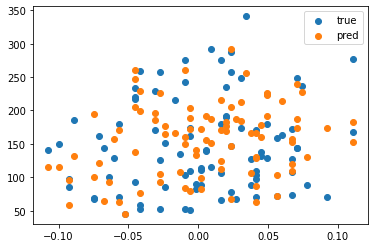

In [127]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

#### 아주 정확하다고는 할 수 없지만 그래도 어느 정도 비슷하다고 볼 수 있다. 

## 당뇨병 수치 회고

Exploration 4에 나온 내용들과 전체적으로 비슷해서 쉽게 생각했는데, 제출 시간에 가까워서도 다 못 끝냈을 만큼 시간이 오래걸렸다. gradient와 loss의 수식은 이해했는데, 이를 코드로 구현한 내용을 아직까지 이해하지 못하고 있다. 

mse score가 5000대에서 떨어지지 않아 많은 시도를 해보았다. 처음에 1001로 시작했던 iter는 10001로, random state은 50에서 2000으로, learning rate은 0.0001에서 0.05까지 높혔다. 

당뇨 수치와 상관관계가 높은 컬럼만 남겨 실험을 해보고자 했으나 에러가 나와, 이를 해결하기 위해 시간을 많이 썼다. 그런데 결국 해결하지 못하고 다른 수치들을 조절해 mse score를 낮추는 방식으로 타협했다.    




# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [171]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

#### 터미널에서 가져오라는 말이 정말 터미널을 켜서 가져오라는 뜻인 줄 알고 헤맸다. 

REF)    
https://didu-story.tistory.com/43

In [172]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Data Fields
- datetime : 시간 
- season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 
- holiday : 공휴일
- workingday : 평일
- weather   
            1: 맑거나 구름 약간 
            2: 안개와 구름
            3: 약간의 눈, 비, 천둥, 번개
            4: 심한 눈, 비, 우박, 안개
- temp : 온도(섭씨) 
- atemp : 체감 온도(섭씨)
- humidity : 상대 습도 
- windspeed :풍속 
- casual : 비회원 대여 
- registered : 회원 대여 
- count : 총 대여 

REF)    
https://www.kaggle.com/c/bike-sharing-demand/data

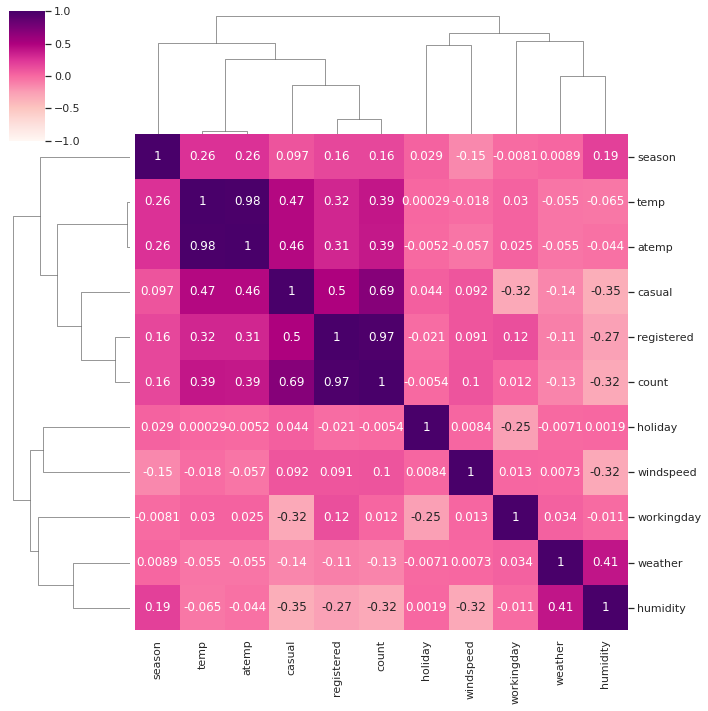

In [174]:
# 히트맵으로 상관관계 파악 
rel = train.corr()
sns.clustermap(rel, annot = True, cmap = 'RdPu', vmin = -1, vmax = 1)

#### 히트맵을 살펴보면 casual, registered가 count와 높은 상관관계를 보이지만, 그러나 casual과 registered는 원래 count의 일부이므로 이는 무시한다 .
#### 이를 제외하면 temp, atemp, humidity가 count와 상관관계가 다소 높음을 알 수 있다. 이 중 temp, atemp는 양의, humidity는 음의 상관관계를 보인다. 
#### 따라서 사람들은 대체로 기온이 높을 수록 자전거를 더 빌리고, 습도가 높을 수록 자전거를 덜 빌린다는 걸 알 수 있다. 

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [175]:
import datetime as dt

train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day                               
train['hour'] = pd.to_datetime(train['datetime']).dt.hour                               
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second                              
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


#### datetime의 포멧을 맞추고, 에러가 생겨 .dt를 넣느라 생각보다 구현하는데 시간이 오래 걸렸다. 

REF)
https://steadiness-193.tistory.com/171    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

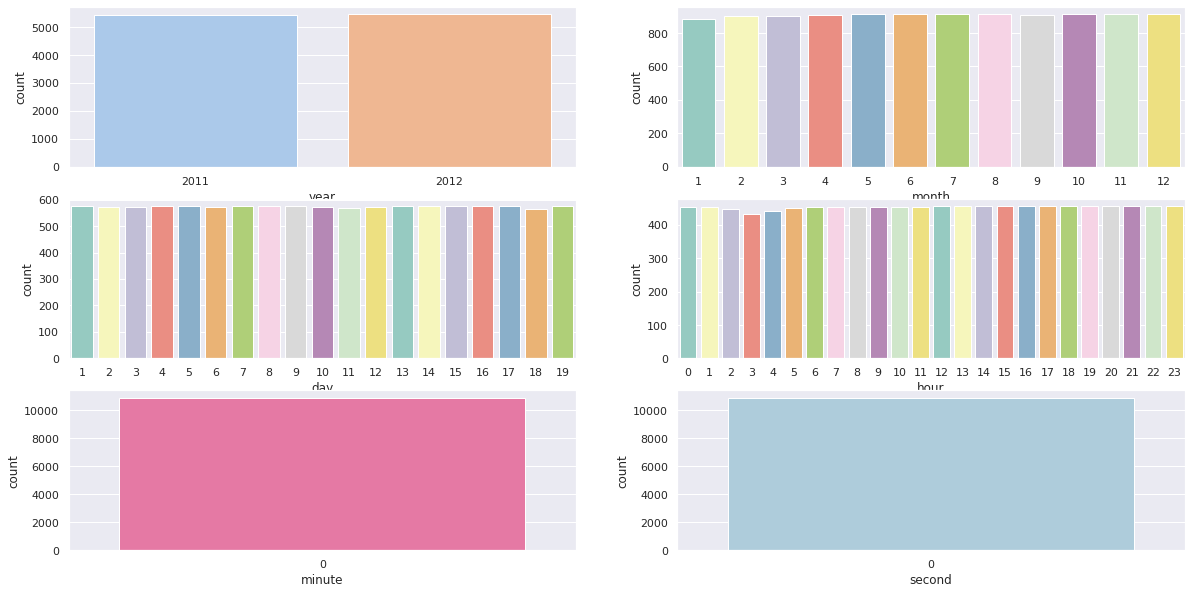

In [176]:
fig = plt.figure(figsize=(20,10))
sns.set(color_codes=True)

ax01 = fig.add_subplot(3,2,1)
ax02 = fig.add_subplot(3,2,2)
ax03 = fig.add_subplot(3,2,3)
ax04 = fig.add_subplot(3,2,4)
ax05 = fig.add_subplot(3,2,5)
ax06 = fig.add_subplot(3,2,6)

sns.countplot(x='year', palette='pastel', data=train, ax=ax01)
sns.countplot(x='month', palette='Set3', data=train, ax=ax02)
sns.countplot(x='day', palette='Set3', data=train, ax=ax03)
sns.countplot(x='hour', palette='Set3', data=train, ax=ax04)
sns.countplot(x='minute', palette='RdPu', data=train, ax=ax05)
sns.countplot(x='second', palette='Paired', data=train, ax=ax06)

plt.show()

#### seaborn에서 그래프 색상을 다양하게 활용해보고 싶어서 적용했는데, 막대가 알록달록해서 오히려 가독성은 떨어지는 것 같다. 

REF)    
https://continuous-development.tistory.com/153 countplot 이용해 함수 여러개 그리기    
https://hleecaster.com/python-seaborn-color/ seaborn 스타일 

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [177]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [179]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour', 'minute', 'second']].values
y = train['count'].values
print("X, y 준비완료!")

X, y 준비완료!


In [180]:
# train, test 데이터 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


## (5) LinearRegression 모델 학습

- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [182]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [189]:
pred = model.predict(X_test)
pred

array([119.40505321, 208.94410497, 234.40474256, ..., 202.11088775,
       127.77335843, 216.79183335])

In [194]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print('mse : ', mse)

mse :  19218.40491919502


In [195]:
rmse = mean_squared_error(y_test, pred)**0.5
print('rmse : ', rmse)

rmse :  138.63046172899743


REF)
https://growingsaja.tistory.com/233 rmse

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

<AxesSubplot:xlabel='temp', ylabel='count'>

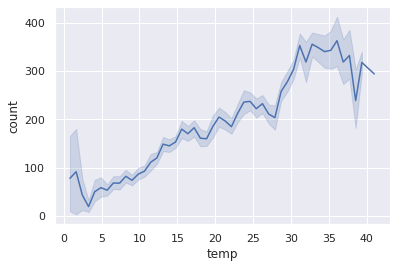

In [199]:
sns.lineplot(x='temp', y='count', data=train)

<AxesSubplot:xlabel='humidity', ylabel='count'>

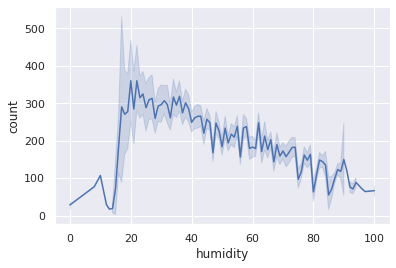

In [213]:
sns.lineplot(x='humidity', y='count', data=train)

#### 두 그래프를 겹쳐서 그리고 싶어서 seaborn과 matplotlib를 활용해 다양한 시도를 해봤으나 결국 실패했다. 
#### 위의 두 그래프를 통해 사람들이 temp 30~35도 사이, 습도 20도 내외에서 가장 많이 자전거를 대여함을 알 수 있다. 

## 자전거 회고

처음 파일을 불러오는 것에서 부터 막혔다. datetime으로 6가지 컬럼 생성하기에서 가장 시간이 오래 걸렸다. 인터넷에 너무 서로 다른 정보가 많아서 그 중에서 선택해서 내가 원하는 결과를 얻도록 구현하는게 어려웠다. 그래도 프로젝트1보다는 시간이 적게 걸렸다. 상관관계가 높은 컬럼만 남겨 모델을 돌려보는 시도를 해보고 싶었는데, 시간이 부족해 이 이상 시도하기 어려웠다. 

to_datetime으로 자료형을 변형하고 subplot으로 그래프 6개 그리는 방법에 대해 더 자세히 알게되었다.  